In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing data

In [38]:
data=pd.read_csv('Salary_Data.csv')

In [39]:
data.sample(10)

,YearsExperience,Salary
19,6.0,93940.0
12,4.0,56957.0
27,9.6,112635.0
21,7.1,98273.0
13,4.1,57081.0
16,5.1,66029.0
14,4.5,61111.0
7,3.2,54445.0
8,3.2,64445.0
15,4.9,67938.0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [41]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Taking out required input 

In [42]:
X=(data.iloc[:,0].values)
y=(data.iloc[:,1].values)

In [43]:
print(X.shape)
print(y.shape)

(30,)
(30,)


## Creating a class for Linear Regression using Gradient Descent

In [44]:
class LinearRegression:
    def __init__(self):
        self.m=0
        self.b=0
    def deriv(self,X,y):
        predict=self.m*X+self.b
        ss_m=(2 * sum(X * (predict-y)))
        ss_b=(2 * sum(predict-y))
        return ss_m,ss_b
    def fit(self,X,y):
        for _ in range(1000):
            learning_rate=0.001
            s_m,s_b=self.deriv(X,y)
            if(s_m=='Nan' or s_b=='Nan'):
                return self
            else:
                self.m=self.m-(s_m*learning_rate)
                self.b=self.b-(s_b*learning_rate)
        return self
    def predict(self,X_test):
        return self.m*X_test+self.b

## Train-Test-Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [46]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

In [47]:
y_pred=regressor.predict(X_test)
y_pred

array([ 65910.09247216,  48355.66989666, 101018.93762316,  64986.1754945 ,
        41888.25105305, 125040.77904226])

## Checking Accuracy of the model

In [48]:
from sklearn.metrics import r2_score
accuracy=r2_score(y_test,y_pred)*100
print("The r2 score of the model is",accuracy)

The r2 score of the model is 95.62731840906517


## plotting the Best fit line

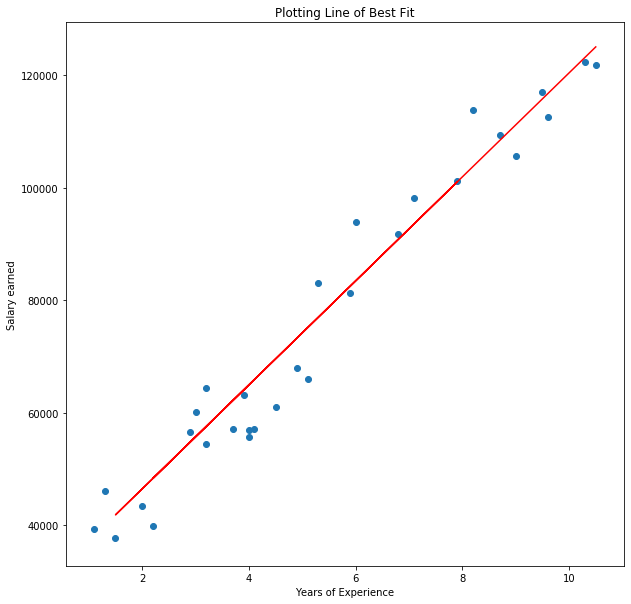

In [49]:
plt.figure(figsize=(10,10))
plt.plot(X_test,y_pred,color='red')
plt.scatter(X,y)
plt.xlabel("Years of Experience")
plt.ylabel("Salary earned")
plt.title("Plotting Line of Best Fit")
plt.show()